In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## a) load/merge data and visualize logerror

In [2]:
# load data into DataFrames
import os
working_directory = os.getcwd()
path = working_directory + '/p1_data/train.csv'
train_df = pd.read_csv(path)
path = working_directory + '/p1_data/properties.csv'
properties_df = pd.read_csv(path)
merge_df = pd.merge(train_df, properties_df, on="id")
display(merge_df)

,id,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,14366692,-0.1684,1/1/16,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015,239071.0,10153.02,NaN,NaN,NaN
1,14739064,-0.0030,1/2/16,NaN,NaN,NaN,1.0,2.0,NaN,NaN,...,NaN,NaN,66834.0,210064.0,2015,143230.0,2172.88,NaN,NaN,6.059040e+13
2,10854446,0.3825,1/3/16,NaN,NaN,NaN,2.0,2.0,NaN,7.0,...,NaN,NaN,55396.0,105954.0,2015,50558.0,1443.69,NaN,NaN,6.037140e+13
3,11672170,-0.0161,1/3/16,1.0,NaN,NaN,4.0,5.0,NaN,1.0,...,NaN,NaN,559040.0,1090127.0,2015,531087.0,13428.94,NaN,NaN,6.037260e+13
4,12524288,-0.0419,1/3/16,NaN,NaN,NaN,1.0,1.0,NaN,7.0,...,NaN,NaN,56233.0,70316.0,2015,14083.0,913.17,NaN,NaN,6.037570e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31720,12756771,0.0658,12/30/16,NaN,NaN,NaN,1.0,3.0,NaN,7.0,...,NaN,NaN,65728.0,307167.0,2015,241439.0,4038.70,NaN,NaN,6.037550e+13
31721,11295458,-0.0294,12/30/16,1.0,NaN,NaN,2.0,2.0,NaN,7.0,...,NaN,NaN,40163.0,50203.0,2015,10040.0,1263.39,Y,15.0,6.037900e+13
31722,11308315,0.0070,12/30/16,1.0,NaN,NaN,3.0,5.0,NaN,4.0,...,NaN,NaN,248378.0,331525.0,2015,83147.0,6461.79,NaN,NaN,6.037900e+13
31723,11703478,0.0431,12/30/16,NaN,NaN,NaN,1.0,3.0,NaN,7.0,...,NaN,NaN,17520.0,39934.0,2015,22414.0,627.91,NaN,NaN,6.037230e+13


In [3]:
# eliminate outliers
max =  np.percentile(merge_df.logerror,99)
min =  np.percentile(merge_df.logerror,1)
merge_df.loc[merge_df.logerror > max, 'logerror'] = max
merge_df.loc[merge_df.logerror < min, 'logerror'] = min

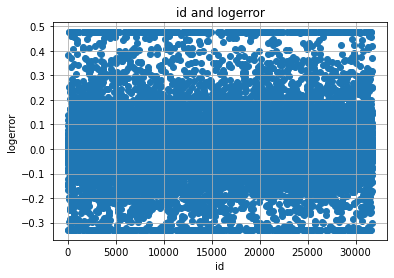

In [4]:
# scatter of logerr
plt.scatter(x = merge_df.index,y = merge_df.logerror )
plt.title('id and logerror')
plt.xlabel('id')
plt.ylabel('logerror')
plt.grid()

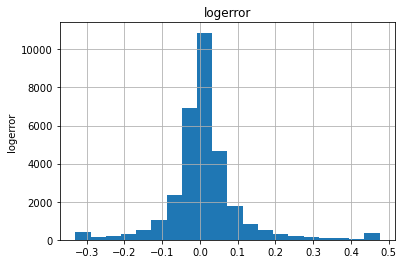

In [5]:
# histogram of logerr
plt.hist(merge_df.logerror,bins = 20)
plt.title('logerror')
plt.ylabel('logerror')
plt.grid()

## b) data cleaning

In [6]:
# build new data frame
column_name_lst = merge_df.columns.tolist()
merge_df.isna().sum()
b_df = pd.DataFrame(columns = ['column_name','missing_count'])
b_df = merge_df.isna().sum().to_frame().reset_index()
b_df.rename(columns = {'index':'column_name', 0:'missing_count'}, inplace = True)
b_df['missing_ratio'] = b_df.missing_count/len(merge_df)
b_df.head(10)

,column_name,missing_count,missing_ratio
0,id,0,0.000000
1,logerror,0,0.000000
2,transactiondate,0,0.000000
3,airconditioningtypeid,21563,0.679685
4,architecturalstyletypeid,31628,0.996942
5,basementsqft,31711,0.999559
6,bathroomcnt,0,0.000000
7,bedroomcnt,0,0.000000
8,buildingclasstypeid,31717,0.999748
9,buildingqualitytypeid,11488,0.362112


In [7]:
# fill missing data
imputed_df = merge_df.fillna(merge_df.mean())
imputed_df.head(10)

,id,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,14366692,-0.1684,1/1/16,1.809683,7.453608,670.571429,3.5,4.0,4.0,5.570193,...,1.450479,1.0,346458.0,585529.0,2015,239071.0,10153.02,NaN,13.314845,6.048996e+13
1,14739064,-0.0030,1/2/16,1.809683,7.453608,670.571429,1.0,2.0,4.0,5.570193,...,1.450479,1.0,66834.0,210064.0,2015,143230.0,2172.88,NaN,13.314845,6.059040e+13
2,10854446,0.3825,1/3/16,1.809683,7.453608,670.571429,2.0,2.0,4.0,7.000000,...,1.450479,1.0,55396.0,105954.0,2015,50558.0,1443.69,NaN,13.314845,6.037140e+13
3,11672170,-0.0161,1/3/16,1.000000,7.453608,670.571429,4.0,5.0,4.0,1.000000,...,1.450479,1.0,559040.0,1090127.0,2015,531087.0,13428.94,NaN,13.314845,6.037260e+13
4,12524288,-0.0419,1/3/16,1.809683,7.453608,670.571429,1.0,1.0,4.0,7.000000,...,1.450479,1.0,56233.0,70316.0,2015,14083.0,913.17,NaN,13.314845,6.037570e+13
5,14091502,-0.0020,1/3/16,1.809683,7.453608,670.571429,2.0,3.0,4.0,5.570193,...,1.000000,1.0,75119.0,253138.0,2015,178019.0,3329.14,NaN,13.314845,6.059100e+13
6,10815909,0.0100,1/3/16,1.000000,7.453608,670.571429,3.0,3.0,4.0,4.000000,...,1.450479,1.0,108985.0,416279.0,2015,307294.0,5194.00,NaN,13.314845,6.037140e+13
7,12453853,-0.0387,1/3/16,1.809683,7.453608,670.571429,1.0,2.0,4.0,7.000000,...,1.450479,1.0,122952.0,260249.0,2015,137297.0,3211.31,NaN,13.314845,6.037570e+13
8,12752047,-0.0440,1/3/16,1.000000,7.453608,670.571429,4.0,3.0,4.0,7.000000,...,1.450479,1.0,154186.0,239456.0,2015,85270.0,3249.37,NaN,13.314845,6.037500e+13
9,14646051,0.0080,1/3/16,1.809683,7.453608,670.571429,2.5,2.0,4.0,5.570193,...,2.000000,True,145291.0,825000.0,2015,679709.0,9553.56,NaN,13.314845,6.059040e+13


## c) univariate analysis

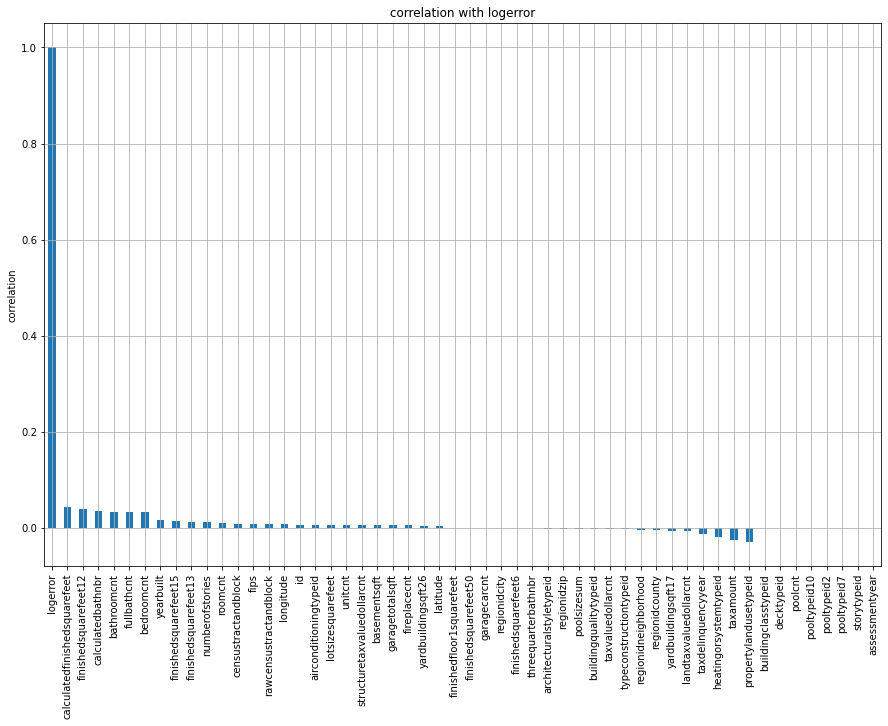

In [8]:
# make bar chart
imputed_df.corr()['logerror'].sort_values(ascending=False).plot(kind='bar', figsize=(15, 10))
plt.title('correlation with logerror')
plt.ylabel('correlation')
plt.grid()

# explain reason
The value does not vary throughout the whole dataset for these columns.


## d) non-linear regression model

In [9]:
# drop categorical features 
# ("hashottuborspa", "propertycountylandusecode", "propertyzoningdesc", "fireplaceflag", "taxdelinquencyflag") 
# drop "id" and "transactiondate"
drop_col_list = ["hashottuborspa", "propertycountylandusecode", "propertyzoningdesc", "fireplaceflag", "taxdelinquencyflag","id","transactiondate"]
df_train = imputed_df.drop(drop_col_list, axis=1)

In [10]:
df_train.drop('logerror',axis = 1)

,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,...,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
0,1.809683,7.453608,670.571429,3.5,4.0,4.0,5.570193,3.5,66.0,1345.146758,...,374.852941,2014.0,1.450479,346458.0,585529.0,2015,239071.0,10153.02,13.314845,6.048996e+13
1,1.809683,7.453608,670.571429,1.0,2.0,4.0,5.570193,1.0,66.0,1345.146758,...,374.852941,1984.0,1.450479,66834.0,210064.0,2015,143230.0,2172.88,13.314845,6.059040e+13
2,1.809683,7.453608,670.571429,2.0,2.0,4.0,7.000000,2.0,66.0,1345.146758,...,374.852941,1954.0,1.450479,55396.0,105954.0,2015,50558.0,1443.69,13.314845,6.037140e+13
3,1.000000,7.453608,670.571429,4.0,5.0,4.0,1.000000,4.0,66.0,1345.146758,...,374.852941,1995.0,1.450479,559040.0,1090127.0,2015,531087.0,13428.94,13.314845,6.037260e+13
4,1.809683,7.453608,670.571429,1.0,1.0,4.0,7.000000,1.0,66.0,1345.146758,...,374.852941,1970.0,1.450479,56233.0,70316.0,2015,14083.0,913.17,13.314845,6.037570e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31720,1.809683,7.453608,670.571429,1.0,3.0,4.0,7.000000,1.0,66.0,1345.146758,...,374.852941,1948.0,1.450479,65728.0,307167.0,2015,241439.0,4038.70,13.314845,6.037550e+13
31721,1.000000,7.453608,670.571429,2.0,2.0,4.0,7.000000,2.0,66.0,1345.146758,...,374.852941,1992.0,1.450479,40163.0,50203.0,2015,10040.0,1263.39,15.000000,6.037900e+13
31722,1.000000,7.453608,670.571429,3.0,5.0,4.0,4.000000,3.0,66.0,1345.146758,...,374.852941,2011.0,1.450479,248378.0,331525.0,2015,83147.0,6461.79,13.314845,6.037900e+13
31723,1.809683,7.453608,670.571429,1.0,3.0,4.0,7.000000,1.0,66.0,1345.146758,...,374.852941,1912.0,1.450479,17520.0,39934.0,2015,22414.0,627.91,13.314845,6.037230e+13


In [11]:
# split and train
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
X = df_train.drop('logerror',axis = 1)
y = df_train['logerror']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)

trans = StandardScaler()
X_train = trans.fit_transform(X_train)

regr = MLPRegressor().fit(X_train, y_train)

In [12]:
# report importances and mse
from sklearn.metrics import mean_squared_error
X_test = trans.fit_transform(X_test)
y_pred = regr.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))

MSE: 0.01794336607315487
